In [ ]:
!pip install transformers pandas openpyxl

In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = '/content/Scraping Tiktok Data.xlsx'
cuentas_busqueda_df = pd.read_excel(file_path, sheet_name='Cuentas_Busqueda')
links_reels_df = pd.read_excel(file_path, sheet_name='Links_Reels')
informacion_reels_df = pd.read_excel(file_path, sheet_name='Informacion_Reels')

# Mostrar las primeras filas de cada DataFrame
cuentas_busqueda_df.head(), links_reels_df.head(), informacion_reels_df.head()

(         Nombre_Usuario                                               Link  \
 0   gustavopetrooficial        https://www.tiktok.com/@gustavopetrooficial   
 1        dejate_llevarr     https://www.tiktok.com/@dejate_llevarr?lang=es   
 2     tualianzacolombia  https://www.tiktok.com/@tualianzacolombia?lang=es   
 3  apoyolaboralcolombia  https://www.tiktok.com/@apoyolaboralcolombia?l...   
 4                   NaN                                                NaN   
 
    Cantidad_Reels  Reels_CompletadosComentarios  Comentarios_Reportados  \
 0             489                           489                  511859   
 1             521                           439                   19253   
 2               0                             0                       0   
 3               0                             0                       0   
 4               0                             0                       0   
 
    Comentarios_Capturados  
 0                   87387  
 1      

In [ ]:
!pip install tqdm

In [ ]:
from transformers import pipeline
from tqdm import tqdm

# Cargar el modelo de análisis de sentimientos
emotion_classifier = pipeline('sentiment-analysis', model='j-hartmann/emotion-english-distilroberta-base')

# Definir una función para analizar las emociones
def analyze_emotions(comment):
    result = emotion_classifier(comment)
    return result[0]['label']

# Limpiar los datos: eliminar NaN y asegurarse de que los comentarios sean cadenas de texto
informacion_reels_df = informacion_reels_df.dropna(subset=['Comentario'])
informacion_reels_df['Comentario'] = informacion_reels_df['Comentario'].astype(str)

# Crear una columna vacía para las emociones
informacion_reels_df['Emocion'] = ""

# Procesar los datos en lotes y mostrar el progreso
batch_size = 100  # Puedes ajustar el tamaño del lote según sea necesario
num_batches = len(informacion_reels_df) // batch_size + 1

for i in tqdm(range(num_batches)):
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size
    batch_comments = informacion_reels_df['Comentario'][batch_start:batch_end]
    informacion_reels_df['Emocion'][batch_start:batch_end] = batch_comments.apply(analyze_emotions)

# Mostrar los resultados
informacion_reels_df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

100%|██████████| 993/993 [1:52:43<00:00,  6.81s/it]


,Nombre_Usuario,Comentario,Me_Gustas,Link_Usuario,Link_Publicacion,Fecha_Consulta,Emocion
0,Karen Milena,"Si pudiera votar por ti mil veces , mil veces ...",567,https://www.tiktok.com/@karenmilena67,https://www.tiktok.com/@gustavopetrooficial/vi...,NaN,fear
1,chontaduros y miel,Cali es la sucursal del cielo y su sucursal se...,589,https://www.tiktok.com/@juanshi96,https://www.tiktok.com/@gustavopetrooficial/vi...,NaN,neutral
2,Frank Takuma,Petro 2026-2030,486,https://www.tiktok.com/@franktakumaoficial,https://www.tiktok.com/@gustavopetrooficial/vi...,NaN,neutral
3,꧁•⊹٭REY VEGETA٭⊹•꧂,Por Dios que cambio? cuál paz si ya los pueblo...,21,https://www.tiktok.com/@camilozea22,https://www.tiktok.com/@gustavopetrooficial/vi...,NaN,neutral
4,leveco,solo cali lo quiere por qué no va a Medellín o...,44,https://www.tiktok.com/@user9884584371534,https://www.tiktok.com/@gustavopetrooficial/vi...,NaN,neutral


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 43457 (\N{JAVANESE LEFT RERENGGAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 43458 (\N{JAVANESE RIGHT RERENGGAN}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Nombre_Usuario ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127476 (\N{REGIONAL INDICATOR SYMBOL LETTER O}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Comentario').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Me_Gustas ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Link_Usuario ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 43457 (\N{JAVANESE LEFT RERENGGAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 43458 (\N{JAVANESE RIGHT RERENGGAN}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Nombre_Usuario ')):
  _plot_series(series, series_name, i)
  fig.legend(title='Nombre_Usuario ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127476 (\N{REGIONAL INDICATOR SYMBOL LETTER O}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Comentario')):
  _plot_series(series, series_name, i)
  fig.legend(title='Comentario', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Me_Gustas ')):
  _plot_series(series, series_name, i)
  fig.legend(title='Me_Gustas ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Link_Usuario ')):
  _plot_series(series, series_name, i)
  fig.legend(title='Link_Usuario ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 43457 (\N{JAVANESE LEFT RERENGGAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 43458 (\N{JAVANESE RIGHT RERENGGAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127476 (\N{REGIONAL INDICATOR SYMBOL LETTER O}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 43457 (\N{JAVANESE LEFT RERENGGAN}) miss

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Comentario'].value_counts()
    for x_label, grp in _df_10.groupby('Nombre_Usuario ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Nombre_Usuario ')
_ = plt.ylabel('Comentario')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127476 (\N{REGIONAL INDICATOR SYMBOL LETTER O}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: Use

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Me_Gustas '].value_counts()
    for x_label, grp in _df_11.groupby('Comentario')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Comentario')
_ = plt.ylabel('Me_Gustas ')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Link_Usuario '].value_counts()
    for x_label, grp in _df_12.groupby('Me_Gustas ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Me_Gustas ')
_ = plt.ylabel('Link_Usuario ')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Emocion'].value_counts()
    for x_label, grp in _df_13.groupby('Link_Usuario ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Link_Usuario ')
_ = plt.ylabel('Emocion')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 43457 (\N{JAVANESE LEFT RERENGGAN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 43458 (\N{JAVANESE RIGHT RERENGGAN}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Nombre_Usuario '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='Nombre_Usuario ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 127476 (\N{REGIONAL INDICATOR SYMBOL LETTER O}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Comentario'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='Comentario', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Me_Gustas '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Me_Gustas ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Link_Usuario '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Link_Usuario ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Calcular el porcentaje de cada emoción
emotion_counts = informacion_reels_df['Emocion'].value_counts(normalize=True) * 100

# Generar el informe
emotion_report = pd.DataFrame(emotion_counts).reset_index()
emotion_report.columns = ['Emocion', 'Porcentaje']
emotion_report

,Emocion,Porcentaje
0,neutral,82.903210
1,fear,5.729833
2,joy,4.600191
3,anger,2.421525
4,surprise,2.072857
5,disgust,1.635512
6,sadness,0.636872


In [ ]:
# Unir las tablas para obtener la información de las cuentas
informacion_reels_df = informacion_reels_df.merge(links_reels_df[['Link', 'Cuenta']], left_on='Link_Publicacion', right_on='Link', how='left')

# Calcular el porcentaje de emociones por cuenta
emotion_by_account = informacion_reels_df.groupby('Cuenta')['Emocion'].value_counts(normalize=True).unstack().fillna(0) * 100

# Mostrar el informe por cuenta
emotion_by_account


Emocion,anger,disgust,fear,joy,neutral,sadness,surprise
Cuenta,,,,,,,
dejate_llevarr,2.015589,0.953185,4.696421,6.235417,82.802959,1.176587,2.119843
gustavopetrooficial,2.490073,1.730234,5.919645,4.405690,82.875027,0.573312,2.006019


In [ ]:
# Guardar el informe de emociones
with pd.ExcelWriter('/content/Emotional_Analysis_Report.xlsx') as writer:
    emotion_report.to_excel(writer, sheet_name='Overall_Emotion_Report', index=False)
    emotion_by_account.to_excel(writer, sheet_name='Emotion_By_Account')

print("El análisis emocional se ha completado y los resultados se han guardado en 'Emotional_Analysis_Report.xlsx'")

El análisis emocional se ha completado y los resultados se han guardado en 'Emotional_Analysis_Report.xlsx'


# **Analisis de Comentarios NEUTROS**

In [ ]:
# Filtrar los comentarios clasificados como neutrales
neutral_comments = informacion_reels_df[informacion_reels_df['Emocion'] == 'neutral']

# Mostrar una muestra de comentarios neutrales
neutral_comments_sample = neutral_comments.sample(n=10, random_state=1)  # Cambia el número según la cantidad que quieras revisar
neutral_comments_sample[['Comentario']]

,Comentario
16403,mi presidente si se vuelve a lanzar cuente con...
55676,peguelo
72398,Kakas
75284,tkm sñr Petro 🥰
9924,queremos reelección Grande PETRÓ !!!
75323,PETRO PRESIDENTE COLOMBIA SIEMPRE
95534,eso es re chevre ya yo fui y no es caro
38507,COMPRANDO LA GENTE CUALQUIERA JAJAJA
89737,"para los que vayan, háganlo en grupo y tengan ..."
65571,Asi es que somos multi pluriculturales😏😏😏 ahor...


In [ ]:
!pip install transformers pandas openpyxl emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from transformers import pipeline
import re
from tqdm import tqdm

# Cargar el modelo de análisis de sentimientos específico para español
emotion_classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Función de preprocesamiento de texto
def preprocess_text(text):
    # Eliminar emojis y caracteres especiales
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Eliminar caracteres no alfanuméricos y extraer texto limpio
    text = re.sub(r'[^\w\s]', '', text)
    # Convertir a minúsculas
    text = text.lower()
    # Corregir errores comunes (agrega correcciones específicas)
    text = re.sub(r'boto', 'voto', text)
    return text

# Limpiar los datos: eliminar NaN y asegurarse de que los comentarios sean cadenas de texto
informacion_reels_df = informacion_reels_df.dropna(subset=['Comentario'])
informacion_reels_df['Comentario'] = informacion_reels_df['Comentario'].astype(str)

# Aplicar preprocesamiento de texto
informacion_reels_df['Comentario_Procesado'] = informacion_reels_df['Comentario'].apply(preprocess_text)

# Crear una columna vacía para las emociones
informacion_reels_df['Emocion'] = ""

# Procesar los datos en lotes y mostrar el progreso
batch_size = 100  # Puedes ajustar el tamaño del lote según sea necesario
num_batches = len(informacion_reels_df) // batch_size + 1

# Función para clasificar emociones con modelo mejorado
def analyze_emotions(comment):
    result = emotion_classifier(comment)
    # Ajustar para devolver la emoción dominante
    return result[0]['label']

for i in tqdm(range(num_batches)):
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size
    batch_comments = informacion_reels_df['Comentario_Procesado'][batch_start:batch_end]
    informacion_reels_df['Emocion'][batch_start:batch_end] = batch_comments.apply(analyze_emotions)

# Mostrar resultados
informacion_reels_df.head()

# Calcular el porcentaje de cada emoción
emotion_counts = informacion_reels_df['Emocion'].value_counts(normalize=True) * 100

# Generar el informe
emotion_report = pd.DataFrame(emotion_counts).reset_index()
emotion_report.columns = ['Emocion', 'Porcentaje']

# Guardar el informe de emociones
with pd.ExcelWriter('/content/Improved_Emotional_Analysis_Report.xlsx') as writer:
    emotion_report.to_excel(writer, sheet_name='Overall_Emotion_Report', index=False)
    informacion_reels_df.to_excel(writer, sheet_name='Detailed_Emotion_Analysis', index=False)

print("El análisis emocional mejorado se ha completado y los resultados se han guardado en 'Improved_Emotional_Analysis_Report.xlsx'")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

100%|██████████| 993/993 [2:42:55<00:00,  9.84s/it]


El análisis emocional mejorado se ha completado y los resultados se han guardado en 'Improved_Emotional_Analysis_Report.xlsx'


# **Graficos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Cargar los archivos Excel desde Google Drive
file_path = '/content/Emotional_Analysis_With_Raw_Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Raw_Data_With_Evaluation')

# Mostrar los nombres de las columnas para verificar
print(data.columns)

Index(['Nombre_Usuario ', 'Comentario', 'Me_Gustas ', 'Link_Usuario ',
       'Link_Publicacion', 'Fecha_Consulta', 'Comentario_Procesado',
       'Emocion'],
      dtype='object')


<ipython-input-40-1b7ae5781f19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star_counts.index, y=star_counts.values, palette='viridis')


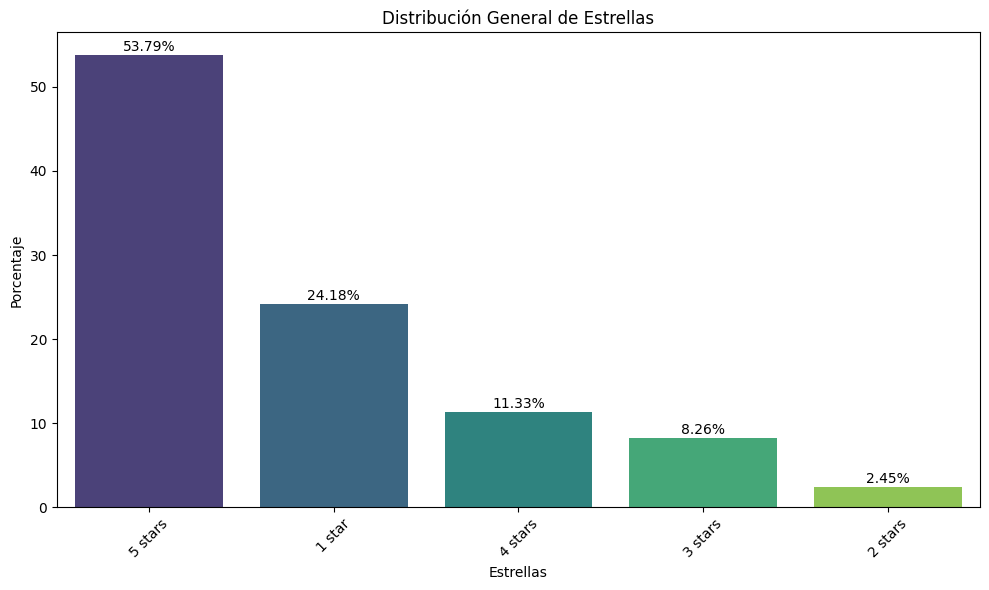

In [ ]:
# Gráfico 1: Distribución General de Estrellas con Texto
star_counts = data['Emocion'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=star_counts.index, y=star_counts.values, palette='viridis')
plt.title('Distribución General de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Porcentaje')

# Agregar etiquetas de texto con el porcentaje
for index, value in enumerate(star_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                  Nombre_Usuario  Numero_Comentarios  \
0                              !                   5   
1                ! ACOS DE CACA¡                   1   
2                        ! Si_02                   2   
3                             !!                   4   
4                            !!!                   1   
5  !!!!!!DESPIERT@COLOMBI@!!!!!!                   1   
6                        !;🖤🖤🖤.!                   1   
7                     !MaFe¡👸🏻👍🏻                   1   
8                 !★ chaeyoung★!                   1   
9                            !★¡                   2   

   Tiempo_Respuesta_Promedio_Horas  
0                       123.512300  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  
5                              NaN  
6                              NaN  
7                              NaN  
8                              NaN  
9            

<ipython-input-42-f99febc75521>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre_Usuario', y='Tiempo_Respuesta_Promedio_Horas', data=top_users, palette='viridis')


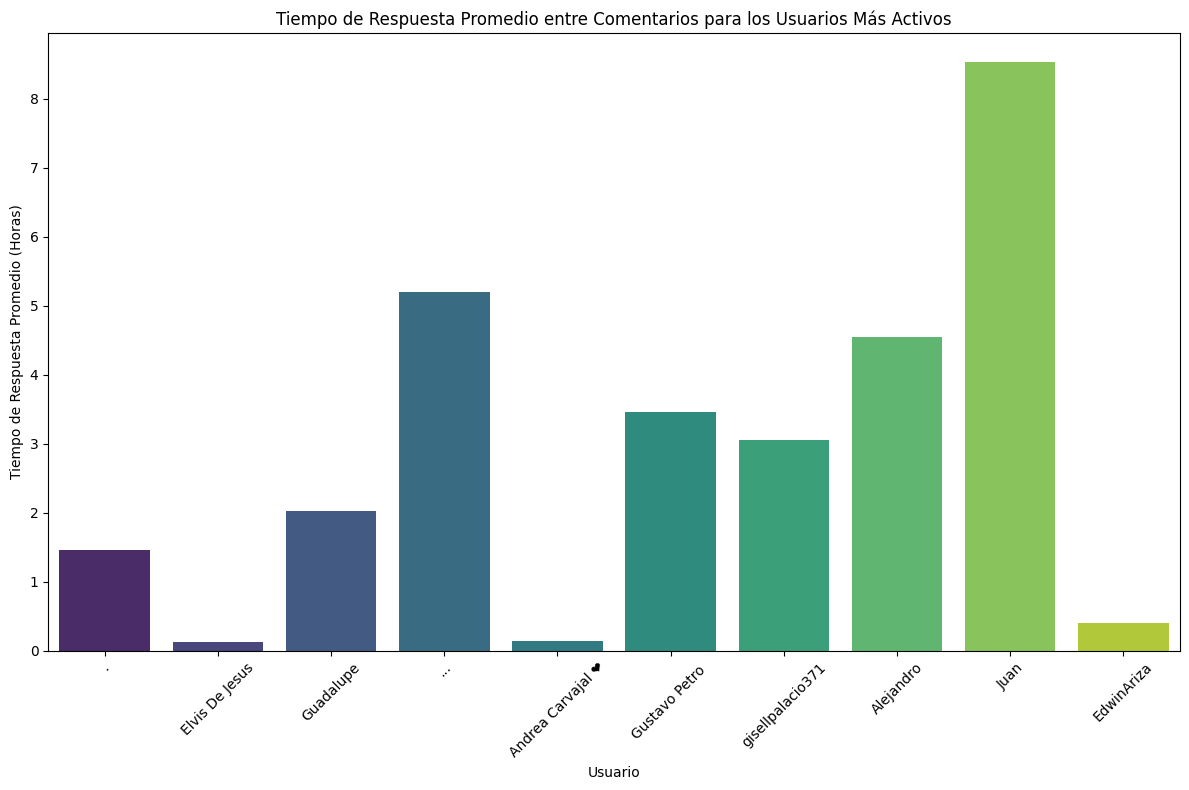

In [ ]:
# Gráfico 2: Tiempos de respuesta
# Asegurarnos de que las columnas estén en el formato correcto
data['Nombre_Usuario '] = data['Nombre_Usuario '].astype(str)
data['Emocion'] = data['Emocion'].astype(str)
data['Fecha_Consulta'] = pd.to_datetime(data['Fecha_Consulta'], errors='coerce')

# Calcular el tiempo de respuesta entre comentarios para cada usuario
data = data.sort_values(by=['Nombre_Usuario ', 'Fecha_Consulta'])
data['Tiempo_Respuesta'] = data.groupby('Nombre_Usuario ')['Fecha_Consulta'].diff().dt.total_seconds() / 3600  # Convertir a horas

# Crear una tabla con la distribución de comentarios y tiempo de respuesta promedio por usuario
user_comment_distribution = data.groupby('Nombre_Usuario ').agg({
    'Comentario': 'count',
    'Tiempo_Respuesta': 'mean'
}).reset_index()

user_comment_distribution.columns = ['Nombre_Usuario', 'Numero_Comentarios', 'Tiempo_Respuesta_Promedio_Horas']

# Mostrar la tabla
print(user_comment_distribution.head(10))  # Mostrar los 10 usuarios más activos

# Gráfico: Tiempo de Respuesta Promedio entre Comentarios para los Usuarios Más Activos
top_users = user_comment_distribution.nlargest(10, 'Numero_Comentarios')
plt.figure(figsize=(12, 8))
sns.barplot(x='Nombre_Usuario', y='Tiempo_Respuesta_Promedio_Horas', data=top_users, palette='viridis')
plt.title('Tiempo de Respuesta Promedio entre Comentarios para los Usuarios Más Activos')
plt.xlabel('Usuario')
plt.ylabel('Tiempo de Respuesta Promedio (Horas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


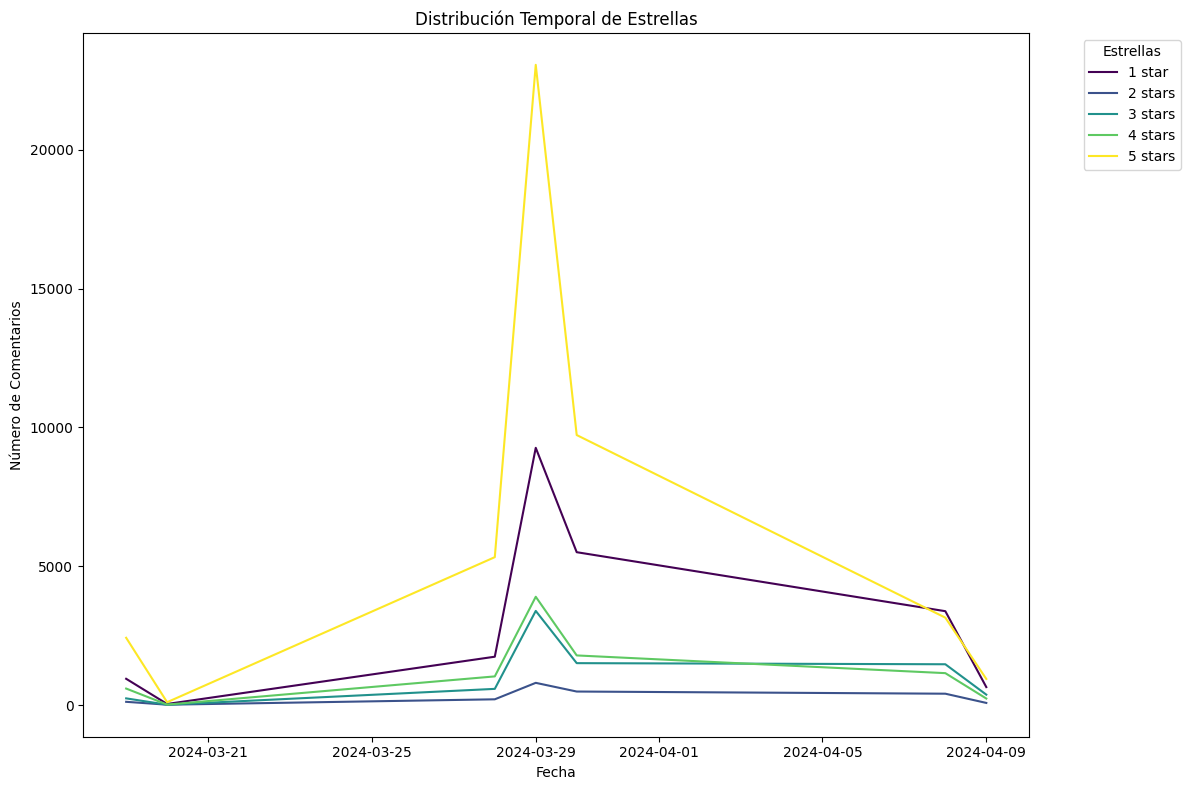

In [ ]:
# Gráfico 3: Distribución Temporal de Estrellas usando 'Fecha_Consulta'
if 'Fecha_Consulta' in data.columns:
    data['Fecha_Consulta'] = pd.to_datetime(data['Fecha_Consulta'], errors='coerce')
    stars_by_date = data.groupby([data['Fecha_Consulta'].dt.date, 'Emocion']).size().unstack().fillna(0)
    stars_by_date.plot(kind='line', figsize=(12, 8), colormap='viridis')
    plt.title('Distribución Temporal de Estrellas')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Comentarios')
    plt.legend(title='Estrellas', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'Fecha_Consulta' no está presente en el DataFrame.")

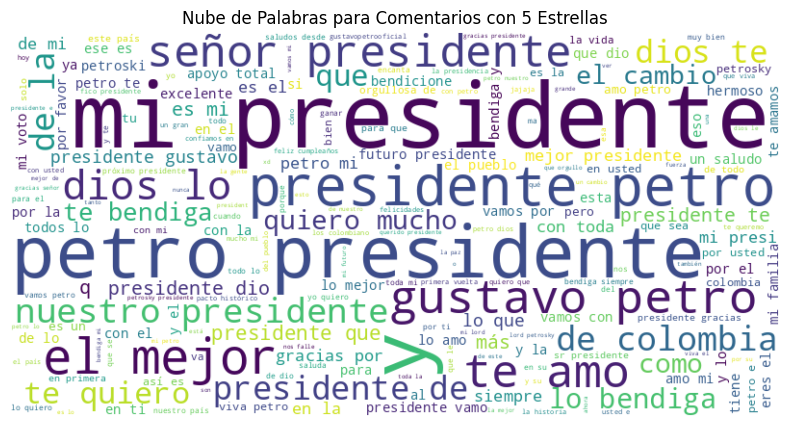

In [ ]:
# Gráfico 4: Nube de Palabras para Comentarios con 5 Estrellas
five_star_comments = data[data['Emocion'] == '5 stars']['Comentario_Procesado']
if len(five_star_comments) > 0:
    five_star_text = ' '.join(five_star_comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(five_star_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras para Comentarios con 5 Estrellas')
    plt.show()
else:
    print("No hay comentarios con 5 estrellas para generar una nube de palabras.")


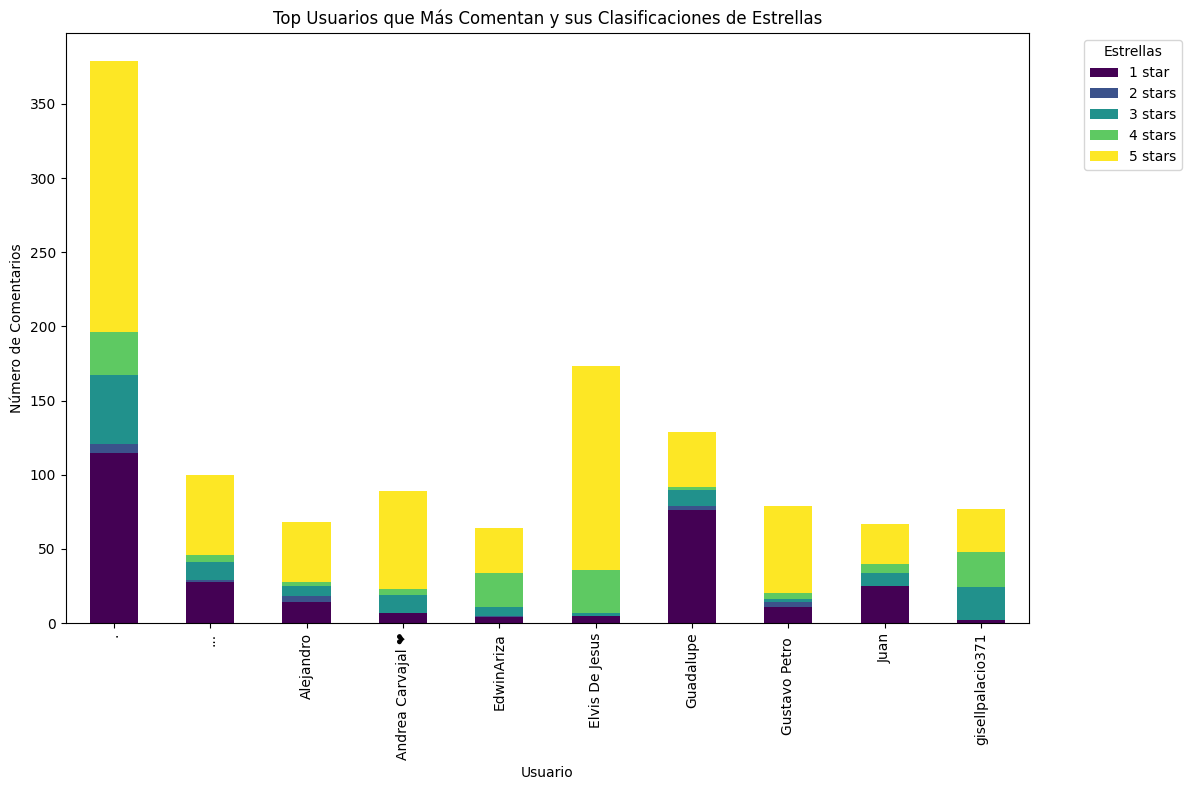

In [ ]:
# Gráfico 5: Top Usuarios que Más Comentan y sus Clasificaciones de Estrellas
# Obtener el top 10 de usuarios que más comentan
top_users = data['Nombre_Usuario '].value_counts().head(10).index
top_user_data = data[data['Nombre_Usuario '].isin(top_users)]

# Contar las estrellas por usuario
user_star_counts = top_user_data.groupby(['Nombre_Usuario ', 'Emocion']).size().unstack().fillna(0)

# Graficar
user_star_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Top Usuarios que Más Comentan y sus Clasificaciones de Estrellas')
plt.xlabel('Usuario')
plt.ylabel('Número de Comentarios')
plt.legend(title='Estrellas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

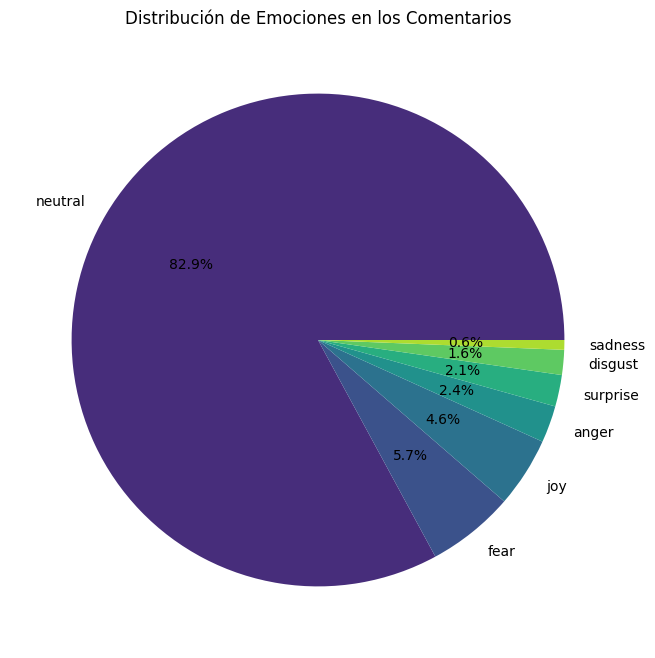

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafico 6 Pastel Emociones
# Datos de la tabla proporcionada
emociones = ['neutral', 'fear', 'joy', 'anger', 'surprise', 'disgust', 'sadness']
porcentajes = [82.903210, 5.729833, 4.600191, 2.421525, 2.072857, 1.635512, 0.636872]

# Generar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=emociones, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(emociones)))
plt.title('Distribución de Emociones en los Comentarios')
plt.show()
